# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [2]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

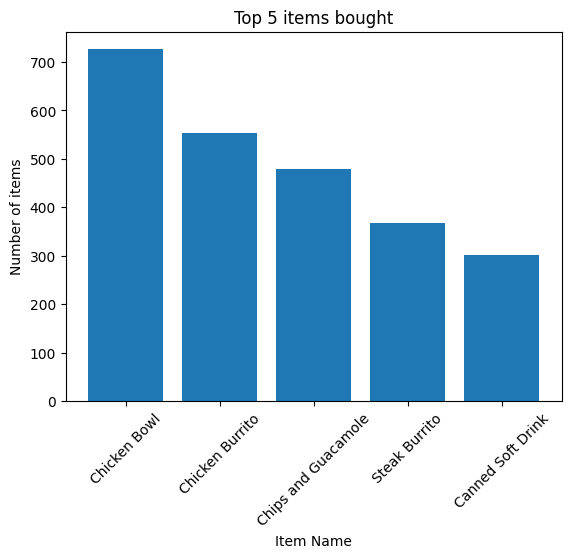

In [4]:
top_5 = chipo.item_name.value_counts().head(5)
plt.bar(top_5.index, top_5.values)
plt.xlabel('Item Name')
plt.ylabel('Number of items')
plt.title('Top 5 items bought')
plt.xticks(rotation=45)
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

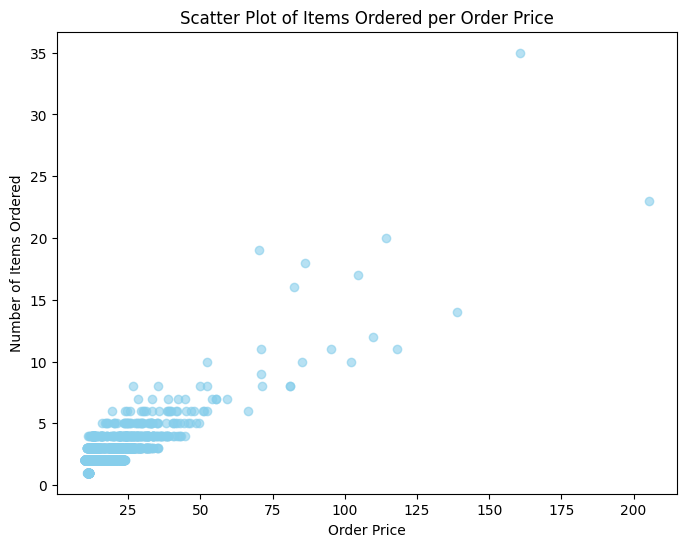

In [5]:
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

order_price = chipo.groupby('order_id')['item_price'].sum()
total_items_ordered = chipo.groupby('order_id')['quantity'].sum()

plt.figure(figsize=(8, 6))
plt.scatter(x=order_price, y=total_items_ordered, color='skyblue', alpha=0.6)

plt.xlabel('Order Price')
plt.ylabel('Number of Items Ordered')
plt.title('Scatter Plot of Items Ordered per Order Price')

plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

가격이 높은 Top 10 제품을 골라 이들을 barplot으로 나타내라

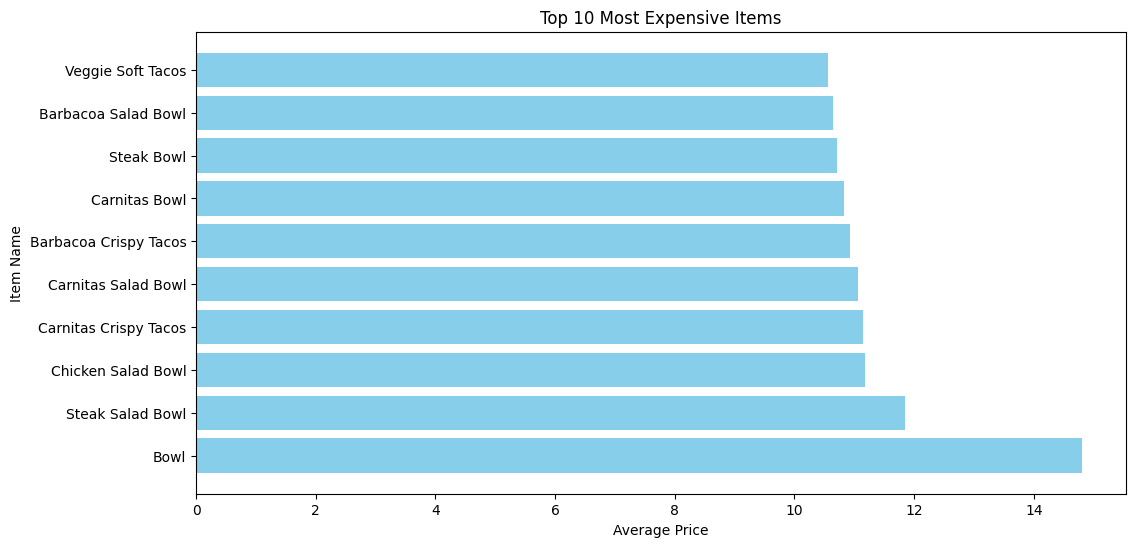

In [6]:
# 제품별 평균 가격 계산
item_avg_price = chipo.groupby('item_name')['item_price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(y=item_avg_price.index, width=item_avg_price.values, color='skyblue')

plt.xlabel('Average Price')
plt.ylabel('Item Name')
plt.title('Top 10 Most Expensive Items')
plt.show()